In [1]:
from torchaudio import transforms as T
from torchaudio import functional as F
import torchaudio
import torch
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [23]:
import subprocess
from pathlib import Path
import os

for file in os.listdir("Data"):
    if not file.endswith(".wav"):
        print(file)
        file_input = os.path.join("Data",file)
        file_output = os.path.join("Data", f"converted_{Path(file).suffix[1:]}_{Path(file).stem}.wav")
        subprocess.run(["ffmpeg", "-i", file_input, file_output])

data.rar
tester.m4a
tester.mp3


In [6]:
# class MyModule(torch.nn.Module):
#     pass

In [77]:
def plot_waveform(waveform, sr, title="Waveform", ax=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    if ax is None:
        _, ax = plt.subplots(num_channels, 1)
    ax.plot(time_axis, waveform[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)
    
def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
    from librosa import power_to_db
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")

torch.Size([2, 201, 32129])


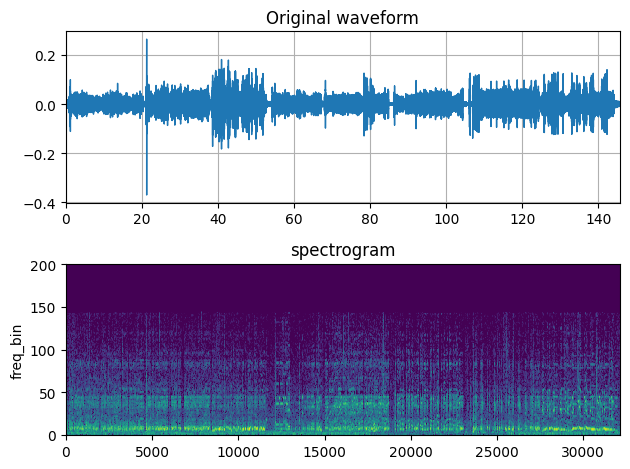

In [40]:
waveform, sr = torchaudio.load("Data/converted_m4a_tester.wav") # this returns a tuple of the waveform and the sample rate

spec = T.Spectrogram()(waveform)
print(spec.shape)

fig, axs = plt.subplots(2, 1)
plot_waveform(waveform, sr, title="Original waveform", ax=axs[0])
plot_spectrogram(spec[0], title="spectrogram", ax=axs[1])
fig.tight_layout()

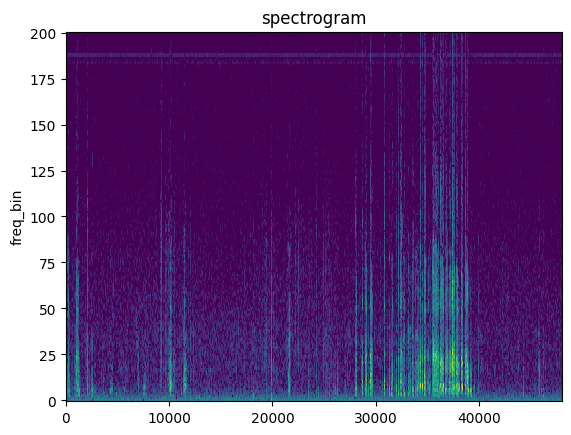

In [156]:
plot_spectrogram(spec[:,:sr], title="spectrogram")

In [215]:
from sklearn.preprocessing import StandardScaler

StandardScaler().fit_transform(snippet)

array([[ 1.11099809,  0.34369181,  0.02383478, ..., -0.2788866 ,
        -0.28169362, -0.31231294],
       [-0.22036718, -0.09667887, -0.13808326, ..., -0.28753945,
        -0.29517394, -0.32566555],
       [-0.11511417, -0.08619777,  0.51916373, ..., -0.25224658,
        -0.25470708, -0.26054937],
       ...,
       [-0.03016101, -0.08134473,  0.17430667, ...,  0.06658214,
         0.08993415,  0.10722063],
       [-0.05665244, -0.03818125,  0.18542952, ..., -0.24090417,
        -0.24040859, -0.23764698],
       [-0.07184354, -0.09381547, -0.26260253, ..., -0.27766822,
        -0.27873942, -0.27464392]])

In [220]:
T.MelSpectrogram()(waveform_out).shape

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


torch.Size([128, 190349])

In [221]:
T.Spectrogram()(waveform_out).shape

torch.Size([201, 190349])

In [315]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

waveform, sr = torchaudio.load("Data/240528 Subject 3.wav") # this returns a tuple of the waveform and the sample rate
waveform_out = waveform[0]
GROUPBY = sr//100 # 1 seconds

spec = T.MFCC(sample_rate=sr, n_mfcc=80)(waveform_out)
spec_out = spec[:,:spec.shape[1] // GROUPBY * GROUPBY].T
spec_grouped = spec_out.reshape(-1, GROUPBY, spec_out.shape[1]).mean(axis=1)

kc = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(spec_grouped)
centroids = kc.cluster_centers_
labels = kc.labels_

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


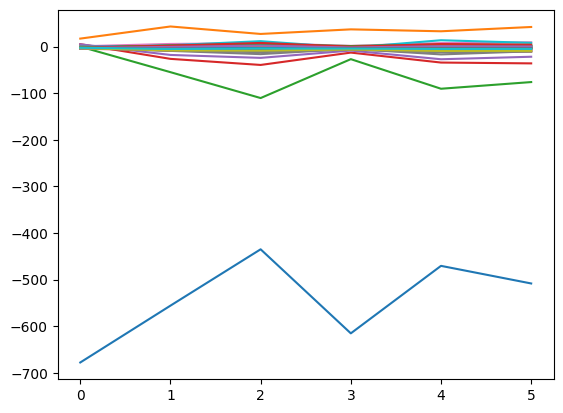

In [280]:
plt.plot(centroids);

(-19.75, 414.75)

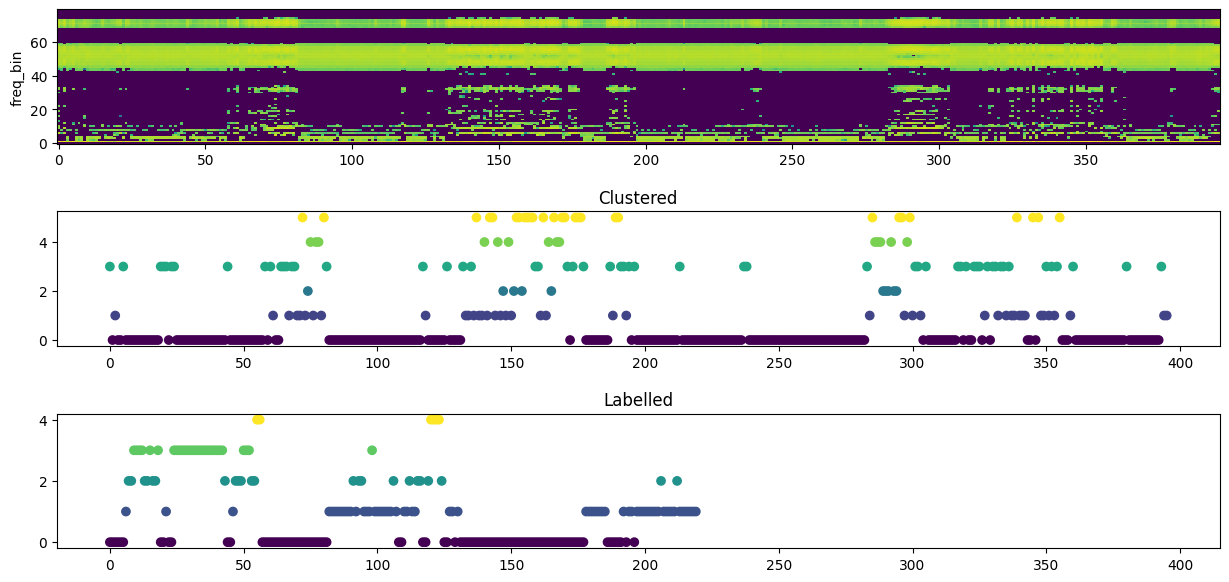

In [338]:
# col_labels = [x for y in [[i]*GROUPBY for i in labels] for x in y]

import pandas as pd
excel_df = pd.read_excel("Data/240608 Subject 3 labelled.xlsx")["Label phase 1"]
label_dict = {j:i for i,j in enumerate(excel_df.unique())}
excel_labels = [label_dict[m] for m in excel_df]

fig, axs = plt.subplots(3, 1)
# figsize:
fig.set_figheight(7)
fig.set_figwidth(15)
# h space subplots:
fig.subplots_adjust(hspace=.5)
plot_spectrogram(spec_grouped.T, ax=axs[0])
axs[1].scatter(range(len(spec_grouped)), labels, c=labels);
axs[1].set_title("Clustered")
axs[2].set_title("Labelled")
ax1_xlim = axs[1].get_xlim()
axs[2].scatter(range(len(excel_labels)), excel_labels, c=excel_labels);
axs[2].set_xlim(ax1_xlim)
# plt.scatter(range(len(snippet_back)), snippet_back, c=col_labels);

In [349]:
x_test = spec_grouped[:len(excel_labels)]
y_test = excel_labels


tensor([[-594.5067,   42.6286,  -37.0628,  ...,  -13.9460,  -13.5569,
           -7.7323],
        [-645.0963,   24.6156,  -13.7096,  ...,   -8.2918,   -9.0042,
           -5.4220],
        [-560.7277,   45.4399,  -60.1973,  ...,  -14.7912,  -14.0010,
           -8.2224],
        ...,
        [-687.9819,   14.6082,    6.3622,  ...,   -4.4109,   -5.5032,
           -3.6153],
        [-689.5085,   13.5969,    7.8329,  ...,   -3.9563,   -5.3305,
           -3.5557],
        [-684.3297,   15.6846,    2.4039,  ...,   -4.3068,   -5.5121,
           -3.5852]])